# IBEX 35 recomendación de cartera

## Introducción

El IBEX 35 es el índice bursátil de referencia de la [Bolsa de Madrid](http://www.bolsamadrid.es/ing/aspx/Portada/Portada.aspx), diseñado para representar el
rendimiento de los mayores valores negociados en el mercado de valores español.

IBEX 35 está formado por los 35 valores más líquidos negociados en el mercado de valores español. Entre los criterios utilizados para que un valor forme parte del índice IBEX 35, no se tiene en cuenta, en ningún caso, el sector económico al que pertenece el citado valor, ya que el índice IBEX 35 no debe guardar ninguna diversificación sectorial específica en su composición. Los componentes del IBEX 35 se ponderan por la capitalización de mercado y ajustado por el capital flotante de cada compañía integrante del índice. 

[Bolsas y Mercados](https://www.bolsasymercados.es/ing/Home) (BME) calcula, publica y difunde en tiempo real el Índice IBEX. BME, la compañía que integra los principales mercados de valores y sistemas financieros en España, , es el quinto mayor operador de mercados de Europa por volumen de contratación de renta variable según datos de la Federación Europea de Bolsas (FESE). 

Desde 1992, el IBEX 35 ha servido de subyacente de contratos de futuros y opciones negociados en MEFF, el mercado de futuros y opciones de BME. IBEX 35 es también el subyacente de fondos cotizados (ETFs) emitidos por BBVA Asset Management y Lyxor Asset Management.
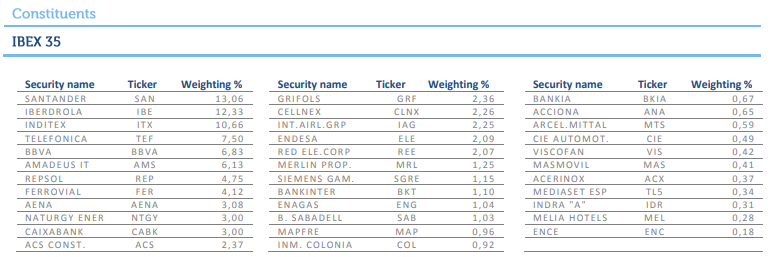
<cite data-cite="http://www.bolsamadrid.es">(http://www.bolsamadrid.es)</cite>

## Planteamiento del problema

Uno de nuestros clientes en nuestro gestor patrimonial está buscando invertir 100.000 euros de sus ahorros en una cartera de acciones. Nuestra empresa está especializada en los mercados europeos y este cliente busca diversificar su cartera.

El cliente está muy satisfecho con nuestro servicio y actualmente tiene inversiones en Reino Unido, Francia y Alemania. Como punto de partida, hemos sugerido que sería una buena oportunidad para explorar un mercado con mayor rentabilidad potencial y que el mercado español está funcionando muy bien para otros clientes.

Después de recibir la información necesaria, el cliente nos comunica su intencion de explorar este mercado. Después de completar una evaluación del perfil de nuestro cliente, abordaremos nuestro estudio siguiendo las siguientes condiciones:
- El cliente busca maximizar el rendimiento de la cartera
- La cartera debe estar compuesta por al menos 5 valores diferentes
- El cliente no quiere tener demasiada exposición a un solo sector

## Descripción de los datos

Para comenzar nuestro estudio, vamos a utilizar [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/) y [Yahoo finance](https://finance.yahoo.com/) API para obtener nuestros datos.  Luego, obtendremos el precio de cierre ajustado de las acciones desde 2015. Utilizaremos datos trimestrales.

Para simplificar nuestro estudio, vamos a utilizar las 10 compañías más grandes del Ibex 35: Aena, Amadeus, BBVA, Endesa, Iberdrola, Inditex, Repsol, Santander, Siemens-Gamesa y Telefónica.

Vamos a utilizar el precio de cierre ajustado para nuestro estudio, ya que este precio incluye cualquier acción corporativa que afecte a cada empresa en particular.

## Metodología

Vamos a utilizar una optimización de varianza media (MVO) de Markowitz, un enfoque para elegir cómo asignar dinero entre múltiples activos considerando la compensación de riesgo-retorno de las combinaciones de activos.

El enfoque considera los rendimientos esperados y la covarianza para todos los activos. Devuelve un conjunto de carteras donde:
- El rendimiento esperado es mayor que cualquier otro con el mismo o menor riesgo.
- El riesgo es menor que cualquier otro con el mismo rendimiento esperado.

Utilizaremos la media de los rendimientos diarios como nuestro rendimiento esperado y luego calcularemos la frontera eficiente: el conjunto de carteras optimizadas para el riesgo y el rendimiento.

### 1. Carga y análisis de los valores

In [5]:
#importamos las librerias
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

In [6]:
top_10_ibex_35 = [
    "AENA.MC", "AMS.MC", "BBVA.MC", "ELE.MC", "IBE.MC",
    "ITX.MC", "REP.MC", "SAN.MC", "SGRE.MC", "TEF.MC"
          ]
start_date = "2015-02-11"
end_date = "2019-09-30"
stock_data = web.get_data_yahoo(top_10_ibex_35, start_date, end_date)

Veamos los datos que hemos descargado de Yahoo Finance

In [7]:
stock_data.head()

Attributes  Adj Close                                                       \
Symbols       AENA.MC     AMS.MC   BBVA.MC     ELE.MC    IBE.MC     ITX.MC   
Date                                                                         
2015-02-11  58.879158  31.653589  6.098383  11.792544  4.747787  23.650713   
2015-02-12  58.879158  32.171757  6.255433  11.883417  4.793811  24.080727   
2015-02-13  62.243683  32.289936  6.448901  11.883417  4.804494  24.378078   
2015-02-16  60.981991  32.249016  6.404138  11.540896  4.743678  24.153917   
2015-02-17  63.000702  32.249016  6.488353  11.572352  4.779017  24.163069   

Attributes                                              ...          Volume  \
Symbols        REP.MC    SAN.MC   SGRE.MC    TEF.MC     ...         AENA.MC   
Date                                                    ...                   
2015-02-11  12.215891  4.692762  9.259046  9.183902     ...      16216420.0   
2015-02-12  12.500957  4.815968  9.562172  9.272492     ...      55651797.0   
2015-02-13  12.869637  4.936038  9.490790  9.339795     ...       8380785.0   
2015-02-16  12.824028  4.928969  9.548482  9.314997     ...        827945.0   
2015-02-17  12.816425  4.949379  9.533816  9.307901     ...       2630220.0   

Attributes                                                            \
Symbols         AMS.MC     BBVA.MC     ELE.MC      IBE.MC     ITX.MC   
Date                                                                   
2015-02-11   1707151.0  30287509.0  2895251.0  51690669.0  3731573.0   
2015-02-12  13048283.0  52952890.0  3629137.0  35337338.0  4508171.0   
2015-02-13   1538500.0  57200390.0  4408647.0  23945584.0  3427564.0   
2015-02-16   7022700.0  74838264.0  3860813.0  27843777.0  1868279.0   
2015-02-17   1476640.0  36555946.0  3338315.0  20698466.0  2766428.0   

Attributes                                                 
Symbols         REP.MC      SAN.MC    SGRE.MC      TEF.MC  
Date                                                       
2015-02-11  10248221.0  90316241.0  3377295.0  31999205.0  
2015-02-12   6850641.0  65443698.0  5147005.0  16000430.0  
2015-02-13   8971413.0  88230439.0  3236361.0  19247585.0  
2015-02-16   4205367.0  37953843.0  1659152.0  10723739.0  
2015-02-17   8388551.0  49706895.0  1943835.0  18823267.0  

[5 rows x 60 columns]

Para nuestro estudio, vamos a utilizar el precio de cierre ajustado:

In [8]:
stock_data_adj_close = stock_data['Adj Close']
stock_data_adj_close.head()

Symbols,AENA.MC,AMS.MC,BBVA.MC,ELE.MC,IBE.MC,ITX.MC,REP.MC,SAN.MC,SGRE.MC,TEF.MC
Date,,,,,,,,,,
2015-02-11,58.879158,31.653589,6.098383,11.792544,4.747787,23.650713,12.215891,4.692762,9.259046,9.183902
2015-02-12,58.879158,32.171757,6.255433,11.883417,4.793811,24.080727,12.500957,4.815968,9.562172,9.272492
2015-02-13,62.243683,32.289936,6.448901,11.883417,4.804494,24.378078,12.869637,4.936038,9.490790,9.339795
2015-02-16,60.981991,32.249016,6.404138,11.540896,4.743678,24.153917,12.824028,4.928969,9.548482,9.314997
2015-02-17,63.000702,32.249016,6.488353,11.572352,4.779017,24.163069,12.816425,4.949379,9.533816,9.307901


Vamos a convertir a datos trimestrales para obtener una mejor representación:

In [9]:
stock_data_adj_close = stock_data_adj_close.resample('Q').last()
stock_data_adj_close.head()

Symbols,AENA.MC,AMS.MC,BBVA.MC,ELE.MC,IBE.MC,ITX.MC,REP.MC,SAN.MC,SGRE.MC,TEF.MC
Date,,,,,,,,,,
2015-03-31,78.654144,36.326180,7.342734,12.582442,4.932702,27.337843,13.177504,5.506541,11.504138,9.504148
2015-06-30,78.847603,32.503567,6.861959,11.998758,4.965575,26.918602,12.330650,5.023462,13.816698,9.410282
2015-09-30,83.061676,35.084518,5.967538,13.467774,4.911424,27.634151,8.149971,3.835518,12.173198,7.993205
2015-12-31,88.655197,37.342411,5.362572,13.242596,5.409420,29.381517,8.283171,3.721877,15.555735,7.770338
2016-03-31,95.426300,34.909603,4.769752,12.325661,4.938130,27.411314,8.119471,3.204755,17.074924,7.479566


### 2. Tasa simple de retorno (RoR)

La tasa de rendimiento es una medida de la cantidad de dinero ganado o perdido en una inversión. Un retorno positivo significa una ganancia y un retorno negativo indica una pérdida.

Tenemos el precio de cierre de las 10 compañías que vamos a estudiar para preparar la asignación de la cartera. Ahora, necesitamos calcular la tasa de rendimiento simple diaria (RoR) de cada acción. ¡Esto se calcula fácilmente usando el método pct_change () en pandas!

In [10]:
simple_rate_of_return = stock_data_adj_close.pct_change()

Echemos un vistazo a las primeras filas:

In [11]:
simple_rate_of_return.head()

Symbols,AENA.MC,AMS.MC,BBVA.MC,ELE.MC,IBE.MC,ITX.MC,REP.MC,SAN.MC,SGRE.MC,TEF.MC
Date,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,0.002460,-0.105230,-0.065476,-0.046389,0.006664,-0.015336,-0.064265,-0.087728,0.201020,-0.009876
2015-09-30,0.053446,0.079405,-0.130345,0.122431,-0.010905,0.026582,-0.339048,-0.236479,-0.118950,-0.150588
2015-12-31,0.067342,0.064356,-0.101376,-0.016720,0.101396,0.063232,0.016344,-0.029628,0.277868,-0.027882
2016-03-31,0.076376,-0.065149,-0.110548,-0.069241,-0.087124,-0.067056,-0.019763,-0.138941,0.097661,-0.037421


### 3. Evolución de los valores:  Tasa de retorno esperado

Podemos ver fácilmente en un gráfico y así comparar la evolución de los distintos valores durante el período de estudio.  Utilizaremos el mismo índice (en este caso 100) para ver la evolución de cada acción.

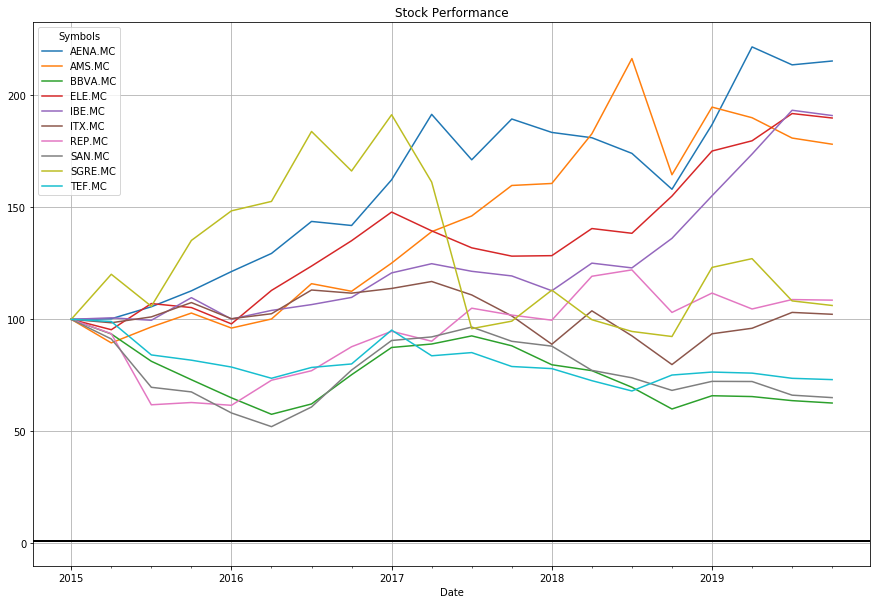

In [12]:
performance = stock_data_adj_close.apply(lambda x: (x / x[0])*100)
performance.plot(grid = True, figsize=(15,10), title = "Stock Performance").axhline(y = 1, color = "black", lw = 2)

In [13]:
performance.tail(1)

Symbols,AENA.MC,AMS.MC,BBVA.MC,ELE.MC,IBE.MC,ITX.MC,REP.MC,SAN.MC,SGRE.MC,TEF.MC
Date,,,,,,,,,,
2019-12-31,215.309705,178.163523,62.632438,189.867745,190.970384,102.248547,108.556224,65.047392,106.179187,73.083883


Podemos ver que hay 4 acciones por debajo de 100 (por lo que el rendimiento es negativo) y el resto está por encima de 100 (por lo que tienen rendimientos positivos). La acción con el mayor rendimiento es AENA (+ 115%) y el peor rendimiento es BBVA (- 38%).

#### Tasa de retorno esperado

Después de visualizar el comportamiento de los valores estos años, necesitamos el rendimiento esperado de cada acción ya que  esto nos ayudará en nuestra selección de cartera. Podemos suponer que el rendimiento esperado es la media del la tasa simple de retorno:

In [14]:
expected_ror = simple_rate_of_return.mean()
expected_ror

Symbols
AENA.MC    0.044903
AMS.MC     0.036578
BBVA.MC   -0.019720
ELE.MC     0.036834
IBE.MC     0.036701
ITX.MC     0.004853
REP.MC     0.012572
SAN.MC    -0.015629
SGRE.MC    0.019087
TEF.MC    -0.013592
dtype: float64

Como se esperaba, la mejor tasa de rendimiento esperada corresponde a Aena (+4.49%) y la peor a BBVA (-2.1%). Vamos a visualizar esta información.

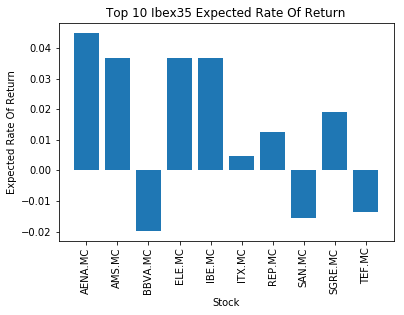

In [15]:
symbols = expected_ror.index
plt.bar(x = symbols,height = expected_ror)
plt.xticks(rotation='vertical')
plt.xlabel('Stock')
plt.ylabel('Expected Rate Of Return')
plt.title('Top 10 Ibex35 Expected Rate Of Return')
plt.show()

### 3. Analisis del riesgo

El riesgo de una inversión se define como la probabilidad de sufrir una pérdida financiera.

Podemos intentar comprender el riesgo utilizando la varianza,  que tan lejos están los diferentes valores de su propia media aritmética. Un activo con una varianza elevada es generalmente más arriesgado porque su rendimiento puede variar significativamente en un corto período de tiempo, lo que lo hace menos estable y más impredecible.

In [16]:
variance = simple_rate_of_return.var()
variance

Symbols
AENA.MC    0.008197
AMS.MC     0.011730
BBVA.MC    0.009988
ELE.MC     0.005498
IBE.MC     0.004502
ITX.MC     0.007856
REP.MC     0.015841
SAN.MC     0.014563
SGRE.MC    0.031722
TEF.MC     0.005954
dtype: float64

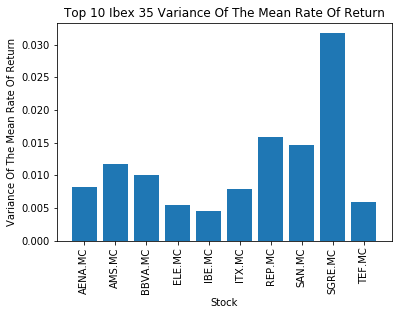

In [17]:
plt.bar(x = symbols ,height = variance)
plt.xticks(rotation='vertical')
plt.xlabel('Stock')
plt.ylabel('Variance Of The Mean Rate Of Return')
plt.title('Top 10 Ibex 35 Variance Of The Mean Rate Of Return')
plt.show()

Siemens-Gamesa muestra la mayor varianza de todas las acciones, lo que indica que puede ser una inversión más arriesgada. Endesa e Iberdrola muestran la varianza más baja, lo que indica que los rendimientos son más predecibles. Esto va de la mano con la típica relación de a de mayor rendimiento, mayor riesgo y menor rendimiento, menor riesgo.

Para comparar mejor el riesgo de cada acción, es mejor usar la Desviación Estándar ya que se expresa misma unidad de medida.

In [18]:
stdev = simple_rate_of_return.std()
stdev * 100

Symbols
AENA.MC     9.053962
AMS.MC     10.830489
BBVA.MC     9.994234
ELE.MC      7.414993
IBE.MC      6.709766
ITX.MC      8.863427
REP.MC     12.586282
SAN.MC     12.067655
SGRE.MC    17.810562
TEF.MC      7.716465
dtype: float64

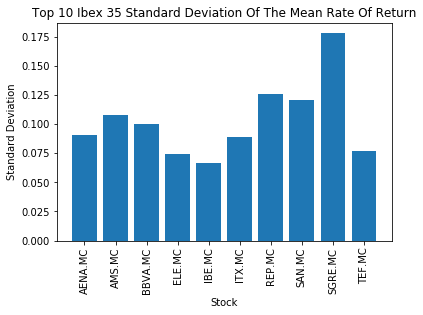

In [19]:
plt.bar(x = symbols ,height = stdev)
plt.xticks(rotation='vertical')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation')
plt.title('Top 10 Ibex 35 Standard Deviation Of The Mean Rate Of Return')
plt.show()

Podemos dividir los valores en 2 grupos en términos de volatilidad:
- Volatilidad superior al 10% (alta volatilidad): Amadeus, Repsol, Santander y Siemens-Gamesa. Siemens-Gamesa tiene la mayor volatilidad, 17.81%
- Volatilidad por debajo del 10% (volatilidad media-baja): Aena, BBVA, Endesa, Iberdrola, Inditex y Telefónica. Es bueno mencionar que Endesa e Iberdrola tienen la volatilidad más baja, 6.97% y 6.70% respectivamente

También podemos ver algunas empresas del mismo sector y valores similares. Por ejemplo, grandes bancos como Santander y BBVA y compañías eléctricas como Iberdrola y Endesa parecen tener una volatilidad similar. Esto nos ayudará a elegir nuestra cartera.

#### Coeficiente de correlación

Ahora vamos a analizar si la existencia de correlacionan entre los distintos valores. Para crear nuestra cartera, no queremos estar expuestos a valores que estén correlacionados entre sí, ya que esto generará más riesgo. Según nuestro análisis sobre la desviación estándar, ya hemos visto un comportamiento similar en algunas acciones.

In [21]:
correlation = simple_rate_of_return.corr()
correlation

Symbols,AENA.MC,AMS.MC,BBVA.MC,ELE.MC,IBE.MC,ITX.MC,REP.MC,SAN.MC,SGRE.MC,TEF.MC
Symbols,,,,,,,,,,
AENA.MC,1.000000,0.436544,0.294261,0.071325,0.269492,0.454739,-0.081132,0.184172,0.493260,-0.042702
AMS.MC,0.436544,1.000000,0.312001,0.081374,0.039933,0.488881,0.322039,0.205585,0.099635,-0.222153
BBVA.MC,0.294261,0.312001,1.000000,0.192654,0.273552,0.376231,0.483238,0.892574,0.009648,0.497443
ELE.MC,0.071325,0.081374,0.192654,1.000000,0.556105,0.426536,0.079119,0.109105,0.135944,0.252253
IBE.MC,0.269492,0.039933,0.273552,0.556105,1.000000,0.606518,0.178103,0.185562,0.205763,0.328047
ITX.MC,0.454739,0.488881,0.376231,0.426536,0.606518,1.000000,0.330295,0.124785,0.218271,-0.066859
REP.MC,-0.081132,0.322039,0.483238,0.079119,0.178103,0.330295,1.000000,0.480268,-0.055721,0.258501
SAN.MC,0.184172,0.205585,0.892574,0.109105,0.185562,0.124785,0.480268,1.000000,0.126251,0.624053
SGRE.MC,0.493260,0.099635,0.009648,0.135944,0.205763,0.218271,-0.055721,0.126251,1.000000,0.302206


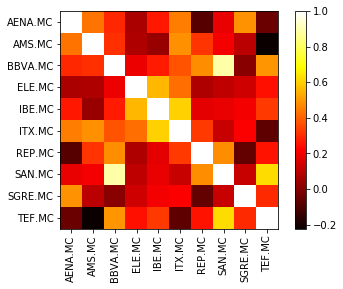

In [22]:
plt.imshow(correlation, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(rotation='vertical')
plt.xticks(range(len(correlation)), correlation.columns)
plt.yticks(range(len(correlation)), correlation.columns);

Como era de esperar, Santander y BBVA tienen una correlación realmente alta de 0.898. También tenemos una alta correlación entre Endesa e Iberdrola: 0.578 (quizás un poco más bajo de lo que esperaría).

Por otro lado, Telefónica y Amadeus tienen la correlación negativa más fuerte.

#### Covarianza

Para ayudar a equilibrar nuestra cartera, podemos ver la relación entre los rendimientos de las diferentes acciones que estamos analizando. Entonces, podemos crear nuestra matriz de covarianza y ver qué conclusión podemos obtener.

In [23]:
#lets calcuate all stocks covariance
covariance = simple_rate_of_return.cov()
covariance

Symbols,AENA.MC,AMS.MC,BBVA.MC,ELE.MC,IBE.MC,ITX.MC,REP.MC,SAN.MC,SGRE.MC,TEF.MC
Symbols,,,,,,,,,,
AENA.MC,0.008197,0.004281,0.002663,0.000479,0.001637,0.003649,-0.000925,0.002012,0.007954,-0.000298
AMS.MC,0.004281,0.011730,0.003377,0.000653,0.000290,0.004693,0.004390,0.002687,0.001922,-0.001857
BBVA.MC,0.002663,0.003377,0.009988,0.001428,0.001834,0.003333,0.006079,0.010765,0.000172,0.003836
ELE.MC,0.000479,0.000653,0.001428,0.005498,0.002767,0.002803,0.000738,0.000976,0.001795,0.001443
IBE.MC,0.001637,0.000290,0.001834,0.002767,0.004502,0.003607,0.001504,0.001503,0.002459,0.001698
ITX.MC,0.003649,0.004693,0.003333,0.002803,0.003607,0.007856,0.003685,0.001335,0.003446,-0.000457
REP.MC,-0.000925,0.004390,0.006079,0.000738,0.001504,0.003685,0.015841,0.007295,-0.001249,0.002511
SAN.MC,0.002012,0.002687,0.010765,0.000976,0.001503,0.001335,0.007295,0.014563,0.002714,0.005811
SGRE.MC,0.007954,0.001922,0.000172,0.001795,0.002459,0.003446,-0.001249,0.002714,0.031722,0.004153


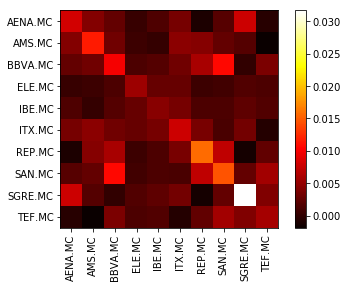

In [24]:
plt.imshow(covariance, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(rotation='vertical')
plt.xticks(range(len(covariance)), covariance.columns)
plt.yticks(range(len(covariance)), covariance.columns);

Es importante incluir en nuestra cartera acciones que no se mueven en la misma dirección. Podemos ver ejemplos como Aena vs Repsol o Telefónica vs Amadeus.

### 3. La ratio de Sharpe o ratio recompensa-variabilidad

La ratio de Sharpe fue desarrollada por el premio Nobel William F. Sharpe y se utiliza para ayudar a los inversores a comprender el retorno de una inversión en comparación con su riesgo. La relación es el rendimiento promedio obtenido en exceso de la tasa libre de riesgo por unidad de volatilidad o riesgo total.

Restar la tasa libre de riesgo del rendimiento medio le permite al inversor aislar mejor las ganancias asociadas con las actividades de toma de riesgos. En general, cuanto mayor es el valor de la relación de Sharpe, más atractivo es el rendimiento ajustado al riesgo.
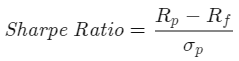

- Rp = rentabilidad de la inversión
- Rf = tasa de interés libre de riesgo
- σp = desviación estándar (volatilidad) del exceso de rendimiento de la inversión

La tasa de rendimiento libre de riesgo es la tasa de rendimiento teórica de una inversión con riesgo cero. La tasa libre de riesgo representa el interés que un inversor esperaría de una inversión absolutamente libre de riesgo durante un período de tiempo específico. La tasa real sin riesgo puede calcularse restando la tasa de inflación actual del rendimiento del bono del Tesoro que coincida con la duración de su inversión.

Por simplicidad, consideraremos Rf = 0

Por ejemplo, hagamos una asignación hipotética de la cartera y luego calcularemos la ratio de Sharpe.

In [25]:
#portfolio weight
portfolio_weight =np.asarray([0.1, 0.1, 0.1, 0.1, 0.1,
                    0.1, 0.1, 0.1, 0.1, 0.1])

#lets calculate the expected quarterly return
portfolio_return = np.sum(expected_ror * portfolio_weight)

#now we need the standard deviation
portfolio_std = np.sqrt(np.dot(portfolio_weight.T, np.dot(covariance, portfolio_weight)))

#Sharpe ratio, Rf = 0
sharpe_ratio = (portfolio_return - 0) / portfolio_std
sharpe_ratio

0.24204423758551594

[¿Qué valor de la ratio de Sharpe es óptimo?](http://www.finanzasparalistos.com/ratio-de-sharpe/)
- Cualquier índice de Sharpe mayor a 1.0 es considerado aceptable por los inversores.
- Una relación superior a 2.0 se califica como muy buena.
- Una relación de 3.0 o superior se considera excelente.
- Una relación por debajo de 1.0 se considera subóptima.

Como bien dice el artículo enlazado, es muy difícil encontrar una ratio de Sharpe por encima de 1. Pero puede servirnos para comparar inversiones. 

Por lo tanto, vamos a usar el valor de la ratio de Sharpe para comparar nuestas diferentes carteras.

### 4. Seleccionando nuestra cartera

Nuestro análisis sobre el riesgo y el rendimiento de las acciones seleccionadas nos dio una buena visión general de cómo podemos jugar más tarde para seleccionar con mayor precisión nuestra cartera. Por ejemplo, sabemos que SAN y BBVA / ENE e IBE se comportan de manera muy similar, por lo que podremos descartar algunas acciones para obtener una mejor cartera.

Por lo tanto, ahora es el momento de hacer nuestra optimización de cartera de varianza media para obtener la frontera eficiente de las mejores carteras. Para hacerlo, simularemos combinaciones aleatorias de carteras (100.000 carteras en este caso). Y luego obtendremos la frontera eficiente.

Vamos a crear algunas funciones ya que vamos a repetir el mismo proceso a medida que vayamos haciendo nuestra selección.

In [26]:
#calculamos la rentabilidad, desviación estandar y ratio de sharpe de cada cartera
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

#generamos carteras aleatorias
def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf, tickers):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterar a través del vector de peso y agregar datos a la matriz de resultados
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [27]:
#mostrar valor en forma de porcentaje
def display_as_percentage(val):
    return '{:.1f}%'.format(val * 100)

#imprimir los resultadps
def print_results(type_string, max_min_str, select_type):
    print("Si {0} el/la {1} obtenemos una rentabilidad de {2}, \
una volatilidad de {3} y una ratio de Sharpe de {4}"
      .format(max_min_str,
              type_string,
             display_as_percentage(select_type[0]),
             display_as_percentage(select_type[1]),
             display_as_percentage(select_type[2])))

#función de seleccion de cartera
def portfolio_selection(stocks):
    mean_returns = expected_ror[stocks]
    cov = simple_rate_of_return[stocks].cov()
    num_portfolios = 100000
    rf = 0.0
    results_df = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf, stocks)
    return results_df

### Frontera eficiente 

#### Todos los valores

Comenzamos con los 10 valores y luego vamos a ir reduciendo nuestra selección.

In [28]:
all_stocks = [
    "AENA.MC", "AMS.MC", "BBVA.MC", "ELE.MC", "IBE.MC",
    "ITX.MC", "REP.MC", "SAN.MC", "SGRE.MC", "TEF.MC"
          ]
results_frame = portfolio_selection(all_stocks)

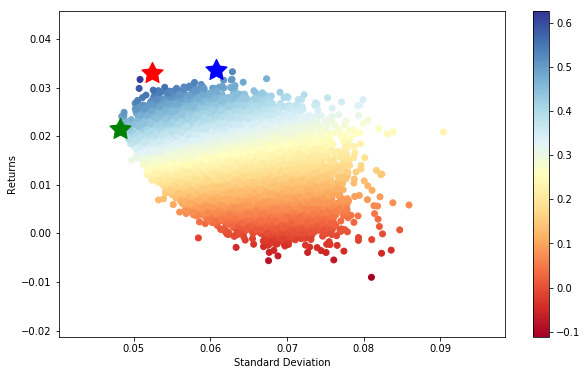

In [29]:
#locate portfolio with highest Sharpe Ratio
max_sharpe_portfolio = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate portfolio with minimum standard deviation
min_volatility_portfolio = results_frame.iloc[results_frame['stdev'].idxmin()]
#locate portfolio with maximum return
max_return_portfolio = results_frame.iloc[results_frame['ret'].idxmax()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(10,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_portfolio[1],max_sharpe_portfolio[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_volatility_portfolio[1],min_volatility_portfolio[0],marker=(5,1,0),color='g',s=500)
#plot blue star to highlight position of maximum return portfolio
plt.scatter(max_return_portfolio[1],max_return_portfolio[0],marker=(5,1,0),color='b',s=500)
plt.show()

Las carteras más óptimas son aquellas en las que el diagrama de dispersión es más azul. Esa es la frontera eficiente. La estrella roja es la cartera con la mejor ratio de Sharpe, la azul es aquella con el mejor rendimiento y el verde el portafolio con menos riesgo.

In [32]:
print_results("ratio de Sharpe", "maximizamos", max_sharpe_portfolio)
print_results("retorno", "maximizamos", max_return_portfolio)
print_results("volatilidad", "minimizamos", min_volatility_portfolio)

Si maximizamos el/la ratio de Sharpe obtenemos una rentabilidad de 3.3%, una volatilidad de 5.2% y una ratio de Sharpe de 62.8%
Si maximizamos el/la retorno obtenemos una rentabilidad de 3.4%, una volatilidad de 6.1% y una ratio de Sharpe de 55.3%
Si minimizamos el/la volatilidad obtenemos una rentabilidad de 2.1%, una volatilidad de 4.8% y una ratio de Sharpe de 44.3%


Por lo tanto, si seleccionamos, por ejemplo, la mejor relación de Sharpe, nuestra asignación sería:

In [31]:
max_sharpe_portfolio.to_frame().T

,ret,stdev,sharpe,AENA.MC,AMS.MC,BBVA.MC,ELE.MC,IBE.MC,ITX.MC,REP.MC,SAN.MC,SGRE.MC,TEF.MC
12205,0.032938,0.052448,0.628012,0.280991,0.00981,0.009696,0.232189,0.283536,0.00889,0.08675,0.00724,0.038953,0.041944


#### Primera seleccion

Para nuestra primera selección, ya sabemos por nuestro análisis anterior que algunas acciones tienen una gran correlación. Es el caso de BBVA y Santander (ambos grandes bancos) y Endesa e Iberdrola (ambas empresas de sector eléctrico). Vamos a seleccionar 1 de cada sector y despues veremos si nuestra relación de nitidez ha mejorado.

Veamos una comparativa rentabilidad vs desviación estandar:
- BBVA: -1.9% vs 9.99%
- SAN: -1.5% vs 12.06%
- ELE: 3.2% vs 7.41%
- IBE: 3.6% vs 6.70%

BBVA y Santander esperan un rendimiento negativo. Voy a mantener Santader y luego eliminarlo, para que podamos ver que tal vez sea una buena idea no incluir acciones con un rendimiento negativo esperado.
Entre Endesa e Iberdrola, voy a seleccionar Iberdrola, ya que parece que los rendimientos son mejores con menos volatilidad.

In [33]:
first_selection_stocks = [
    "AENA.MC", "AMS.MC", "IBE.MC",
    "ITX.MC", "REP.MC", "SAN.MC", "SGRE.MC", "TEF.MC"
          ]
results_frame = portfolio_selection(first_selection_stocks)

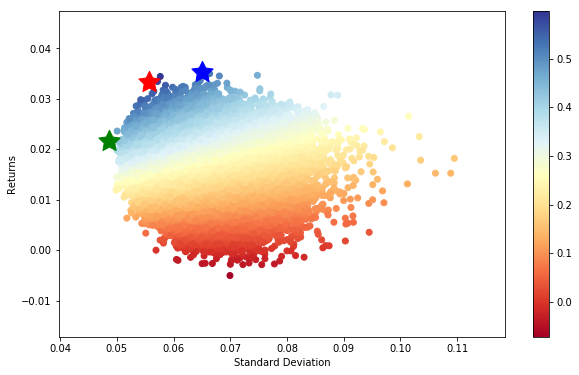

In [34]:
#locate portfolio withhighest Sharpe Ratio
max_sharpe_portfolio = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate portfolio with minimum standard deviation
min_volatility_portfolio = results_frame.iloc[results_frame['stdev'].idxmin()]
#locate portfolio with maximum return
max_return_portfolio = results_frame.iloc[results_frame['ret'].idxmax()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(10,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_portfolio[1],max_sharpe_portfolio[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_volatility_portfolio[1],min_volatility_portfolio[0],marker=(5,1,0),color='g',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(max_return_portfolio[1],max_return_portfolio[0],marker=(5,1,0),color='b',s=500)
plt.show()

In [35]:
print_results("ratio de Sharpe", "maximizamos", max_sharpe_portfolio)
print_results("retorno", "maximizamos", max_return_portfolio)
print_results("volatilidad", "minimizamos", min_volatility_portfolio)

Si maximizamos el/la ratio de Sharpe obtenemos una rentabilidad de 3.3%, una volatilidad de 5.6% y una ratio de Sharpe de 59.9%
Si maximizamos el/la retorno obtenemos una rentabilidad de 3.5%, una volatilidad de 6.5% y una ratio de Sharpe de 54.4%
Si minimizamos el/la volatilidad obtenemos una rentabilidad de 2.2%, una volatilidad de 4.9% y una ratio de Sharpe de 44.3%


Con esta primera selección, hemos mejorado el rendimiento con una relación Sharpe similar. Por otro lado, nuestra cartera más conservadora está desempeñando peor.

#### Segunda selección

¿Qué sucede si eliminamos todas las acciones con un rendimiento esperado negativo?

Volvamos al primer paso y eliminemos esas acciones con rendimientos negativos:
- BBVA -2.1%
- Santander -1.5%
- Telefonica -1.3%

In [36]:
#remove negative return stocks
no_negative_return = [
    "AENA.MC", "AMS.MC", "ELE.MC", "IBE.MC",
    "ITX.MC", "REP.MC", "SGRE.MC"
          ]
results_frame = portfolio_selection(no_negative_return)

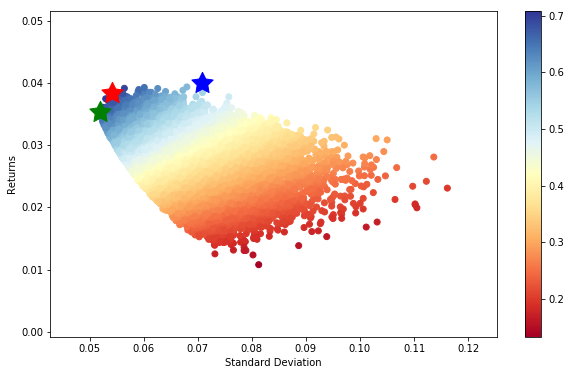

In [37]:
#locate portfolio withhighest Sharpe Ratio
max_sharpe_portfolio = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate portfolio with minimum standard deviation
min_volatility_portfolio = results_frame.iloc[results_frame['stdev'].idxmin()]
#locate portfolio with maximum return
max_return_portfolio = results_frame.iloc[results_frame['ret'].idxmax()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(10,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_portfolio[1],max_sharpe_portfolio[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_volatility_portfolio[1],min_volatility_portfolio[0],marker=(5,1,0),color='g',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(max_return_portfolio[1],max_return_portfolio[0],marker=(5,1,0),color='b',s=500)
plt.show()

In [29]:
print_results("ratio de Sharpe", "maximizamos", max_sharpe_portfolio)
print_results("retorno", "maximizamos", max_return_portfolio)
print_results("volatilidad", "minimizamos", min_volatility_portfolio)

If we maximise the Sharpe Ratio we get a return of 3.7%, volatility of 5.3% and sharpe ratio of 69.8%
If we maximise the Return we get a return of 4.0%, volatility of 7.7% and sharpe ratio of 51.6%
If we minimise the Volatility we get a return of 3.3%, volatility of 5.1% and sharpe ratio of 65.5%


Nuestros rendimientos han mejorado en todos nuestros enfoques. El mejor enfoque de ratio de Sharpe parece funcionar realmente bien. Esto nos dice que una inversión agresiva realmente no nos proporciona ningún beneficio.

Vamos a hacer otro análisis más y descartar nuevamente a Endesa y ver los valores.

In [38]:
#remove negative return stocks and intercorrelated
no_negative_return_no_inter = [
    "AENA.MC", "AMS.MC", "IBE.MC",
    "ITX.MC", "REP.MC", "SGRE.MC"
          ]
results_frame = portfolio_selection(no_negative_return_no_inter)

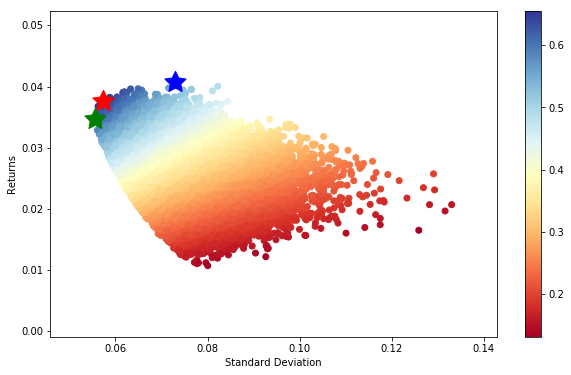

In [39]:
#locate portfolio withhighest Sharpe Ratio
max_sharpe_portfolio = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate portfolio with minimum standard deviation
min_volatility_portfolio = results_frame.iloc[results_frame['stdev'].idxmin()]
#locate portfolio with maximum return
max_return_portfolio = results_frame.iloc[results_frame['ret'].idxmax()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(10,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_portfolio[1],max_sharpe_portfolio[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_volatility_portfolio[1],min_volatility_portfolio[0],marker=(5,1,0),color='g',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(max_return_portfolio[1],max_return_portfolio[0],marker=(5,1,0),color='b',s=500)
plt.show()

In [42]:
print_results("ratio de Sharpe", "maximizamos", max_sharpe_portfolio)
print_results("retorno", "maximizamos", max_return_portfolio)
print_results("volatilidad", "minimizamos", min_volatility_portfolio)

Si maximizamos el/la ratio de Sharpe obtenemos una rentabilidad de 3.8%, una volatilidad de 5.7% y una ratio de Sharpe de 65.6%
Si maximizamos el/la retorno obtenemos una rentabilidad de 4.1%, una volatilidad de 7.3% y una ratio de Sharpe de 55.9%
Si minimizamos el/la volatilidad obtenemos una rentabilidad de 3.5%, una volatilidad de 5.6% y una ratio de Sharpe de 62.3%


Parece que estamos haciendo un buen trabajo mejorando nuestros retornos esperados, pero esto está aumentando la volatilidad de nuestra cartera, por lo tanto, nuestro índice de Sharpe es peor que en nuestro escenario anterior.

#### Tercera selección

Por lo tanto, mirando de nuevo el riesgo frente al rendimiento, podemos ver que Siemens-Gamesa tiene la mayor volatilidad, pero los rendimientos son un poco mejores que los de Repsol solamente. Además, Repsol tiene alguna correlación negativa con Siemens-Gamesa y también con Aena. Parece ser una opción sensata no incluir Siemens-Gamesa.

In [41]:
#removing Siemens-Gamesa
third_selection = [
    "AENA.MC", "AMS.MC", "IBE.MC",
    "ITX.MC", "REP.MC"
          ]
results_frame = portfolio_selection(third_selection)

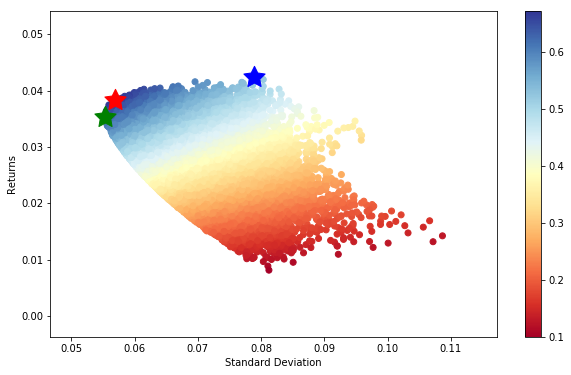

In [43]:
#locate portfolio withhighest Sharpe Ratio
max_sharpe_portfolio = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate portfolio with minimum standard deviation
min_volatility_portfolio = results_frame.iloc[results_frame['stdev'].idxmin()]
#locate portfolio with maximum return
max_return_portfolio = results_frame.iloc[results_frame['ret'].idxmax()]

#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(10,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_portfolio[1],max_sharpe_portfolio[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_volatility_portfolio[1],min_volatility_portfolio[0],marker=(5,1,0),color='g',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(max_return_portfolio[1],max_return_portfolio[0],marker=(5,1,0),color='b',s=500)
plt.show()

In [44]:
print_results("Sharpe Ratio", "maximise", max_sharpe_portfolio)
print_results("Return", "maximise", max_return_portfolio)
print_results("Volatility", "minimise", min_volatility_portfolio)

Si maximise el/la Sharpe Ratio obtenemos una rentabilidad de 3.8%, una volatilidad de 5.7% y una ratio de Sharpe de 67.3%
Si maximise el/la Return obtenemos una rentabilidad de 4.2%, una volatilidad de 7.9% y una ratio de Sharpe de 53.7%
Si minimise el/la Volatility obtenemos una rentabilidad de 3.5%, una volatilidad de 5.5% y una ratio de Sharpe de 64.0%


Nuestros retornos esperados van en la buena dirección y parece que la relación de Sharpe es similar a la mejor hasta ahora.

Entonces podemos ver a continuación la distribución de las carteras que parecen ser buenas opciones para nuestro cliente:

1. Mayor rentabilidad

In [45]:
max_return_portfolio.to_frame().T

,ret,stdev,sharpe,AENA.MC,AMS.MC,IBE.MC,ITX.MC,REP.MC
30530,0.042351,0.078865,0.537008,0.713666,0.212637,0.067421,0.003403,0.002872


2. Mejor ratio de Sharpe

In [46]:
max_sharpe_portfolio.to_frame().T

,ret,stdev,sharpe,AENA.MC,AMS.MC,IBE.MC,ITX.MC,REP.MC
78307,0.038306,0.056919,0.67299,0.269456,0.149123,0.559056,0.006126,0.016239


## Conclusión

Después de estudiar las 10 principales acciones del mercado español, parece que hemos logrado lo que el cliente estaba buscando:
- Tenemos nuestra cartera de 5 acciones diferentes
- Hemos diversificado nuestra selección incluyendo 4 sectores:
 - tecnología
 - Energía: eléctrica, gas y petróleo.
 - Ropa
 - Aerolíneas
- Hemos maximizado nuestro retorno

Entendemos que el cliente está buscando el mejor rendimiento, y en esta ocasión sería un rendimiento trimestral esperado del 4,2%, pero no recomendaría esta opción al cliente ya que el 71% de la asignación es solo una acción: Aena. Este no es un buen enfoque ya que la cartera estaría demasiado expuesta a solo 1 sector.

Por otro lado, maximizando la relación de nitidez, obtenemos una cartera más equilibrada, aunque está bastante expuesta a Iberdrola. Pero sabemos que Iberdrola es la acción con la volatilidad más baja, por lo que esto tiene sentido. Pero el rendimiento trimestral esperado es del 3,8%, muy bueno si comparamos la volatilidad del 5,7% frente al 7,8%.

La última decisión corresponde al cliente, pero le hemos proporcionado buenas herramientas para asignar su dinero.

### Cartera Recomendada

Aena: 26.9456 %

Amadeus: 14.9123 %

Iberdrola: 55.9056 %

Inditex: 0.6126 %

Repsol: 1.6239 %